<a href="https://colab.research.google.com/github/Vasu-Rocks/Shopper-Spectrum-Customer-Segmentation-and-Product-Recommendations-in-E-Commerce/blob/main/Shopper_Spectrum_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

### Step 1:Dataset Collection and understanding

In [208]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, silhouette_score

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import StandardScaler
import joblib
import pickle

In [209]:
df = pd.read_csv("online_retail.csv")

In [210]:
df.shape

(541909, 8)

In [211]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [212]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [213]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [215]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [216]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


In [217]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [218]:
df.duplicated().sum()

np.int64(5268)

In [219]:
(df['Quantity'] <= 0).sum()

np.int64(10624)

In [220]:
(df['UnitPrice'] <= 0).sum()

np.int64(2517)

In [221]:
cancelled_invoices = df[df["InvoiceNo"].astype(str).str.startswith('C')]

In [222]:
cancelled_invoices["InvoiceNo"].count()

np.int64(9288)

In [223]:
cancelled_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2022-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2022-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2022-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2022-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2023-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2023-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2023-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2023-12-09 11:58:00,1.25,17315.0,United Kingdom


### Step 2: 📌 Data Preprocessing

In [224]:
# Remove rows with missing CustomerID
df = df.dropna(subset = ["CustomerID"])

In [225]:
df.shape

(406829, 8)

In [226]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [227]:
# Removing the rows with cancelled invoice numbers(invoice numbers starts with C)
cancelled_invoices = df[df["InvoiceNo"].astype(str).str.startswith('C')]
df = df.drop(index = cancelled_invoices.index)

In [228]:
df.shape

(397924, 8)

In [229]:
df.nunique()

,0
InvoiceNo,18536
StockCode,3665
Description,3877
Quantity,302
InvoiceDate,17286
UnitPrice,441
CustomerID,4339
Country,37


In [230]:
# Remove negative or zero quantities and prices
df[(df['Quantity'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [231]:
df[(df['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2022-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2022-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2022-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2023-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2023-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2023-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2023-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2023-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2023-04-04 14:42:00,0.0,14410.0,United Kingdom


In [232]:
unit_price_zero_or_lesser = df[(df['UnitPrice'] <= 0)]

In [233]:
unit_price_zero_or_lesser.index

Index([  9302,  33576,  40089,  47068,  47070,  56674,  86789, 130188, 139453,
       145208, 157042, 187613, 198383, 279324, 282912, 285657, 298054, 314745,
       314746, 314747, 314748, 358655, 361825, 379913, 395529, 420404, 436428,
       436597, 436961, 439361, 446125, 446793, 446794, 454463, 454464, 479079,
       479546, 480649, 485985, 502122],
      dtype='int64')

In [234]:
df = df.drop(index = unit_price_zero_or_lesser.index)

In [235]:
df = df.drop_duplicates()

In [236]:
df.duplicated().sum()

np.int64(0)

In [237]:
df.shape

(392692, 8)

In [238]:
df["InvoiceNo"] = df["InvoiceNo"].astype(int)

In [239]:
df.describe(include="all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,392692.000000,392692,392692,392692.000000,392692,392692.000000,392692.000000,392692
unique,NaN,3665,3877,NaN,17282,NaN,NaN,37
top,NaN,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-11-14 15:27:00,NaN,NaN,United Kingdom
freq,NaN,2023,2016,NaN,542,NaN,NaN,349203
mean,560590.875047,NaN,NaN,13.119702,NaN,3.125914,15287.843865,NaN
std,13087.063759,NaN,NaN,180.492832,NaN,22.241836,1713.539549,NaN
min,536365.000000,NaN,NaN,1.000000,NaN,0.001000,12346.000000,NaN
25%,549234.000000,NaN,NaN,2.000000,NaN,1.250000,13955.000000,NaN
50%,561874.000000,NaN,NaN,6.000000,NaN,1.950000,15150.000000,NaN
75%,572061.000000,NaN,NaN,12.000000,NaN,3.750000,16791.000000,NaN


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int64  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 27.0+ MB


### Step 3 :📌 Exploratory Data Analysis (EDA)

In [241]:
# Number of transactions by country

transactions_by_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

In [242]:
transactions_by_country.head(10)

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Portugal,57
Australia,57


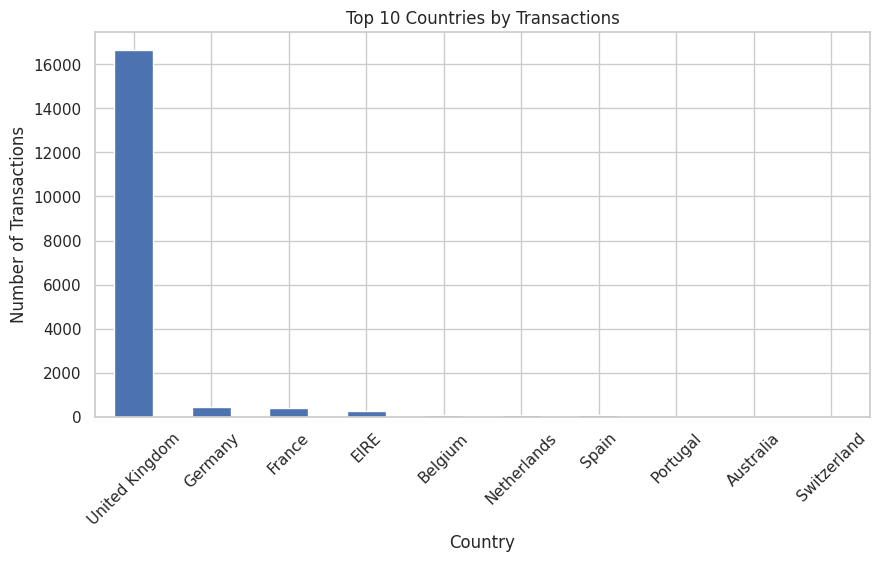

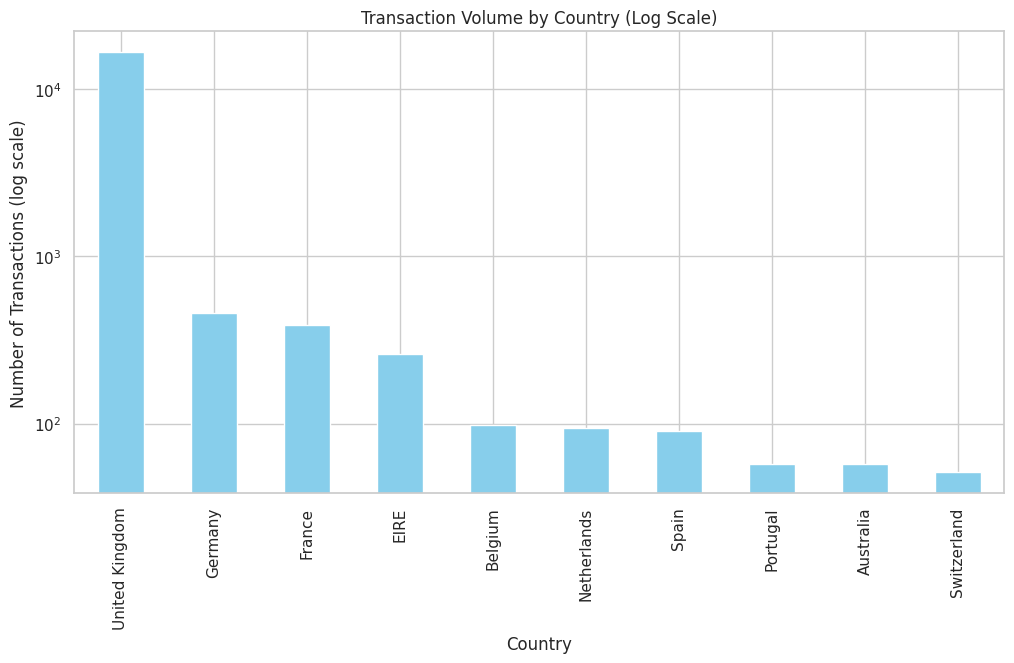

In [243]:
transactions_by_country.head(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Transactions')
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
transactions_by_country.head(10).plot(kind='bar', color='skyblue')
plt.yscale('log')  # log scale helps compress the skew
plt.title('Transaction Volume by Country (Log Scale)')
plt.ylabel('Number of Transactions (log scale)')

plt.show()

In [244]:
topselling_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

In [245]:
topselling_products.head(10)

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


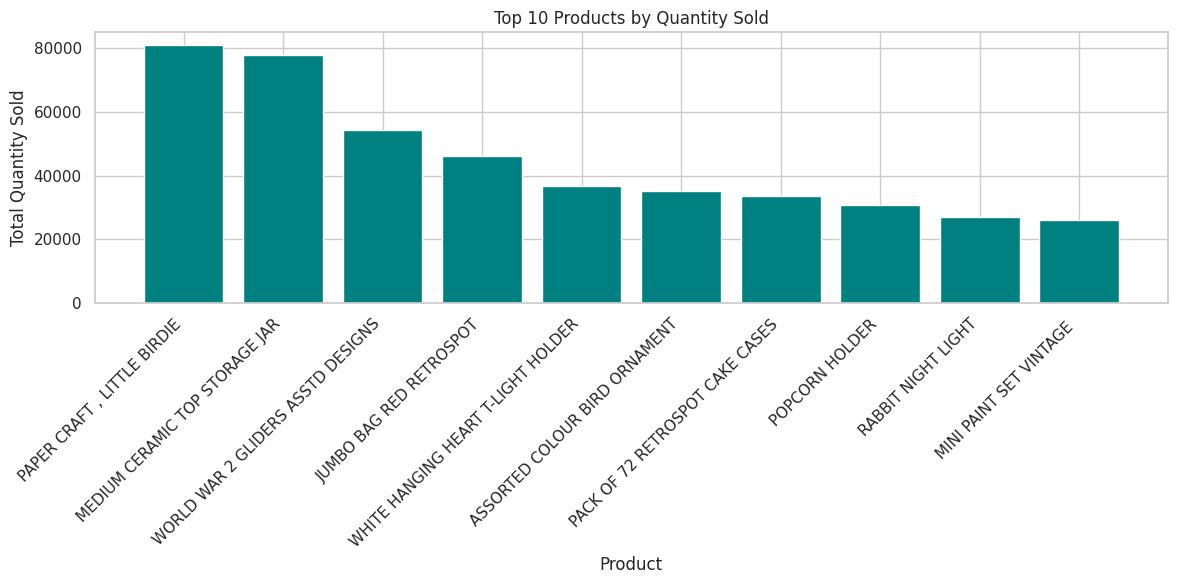

In [246]:
top_10 = topselling_products.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_10.index, top_10.values, color='teal')
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [247]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [248]:
df['Month'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp().dt.strftime('%b %Y')

In [249]:
df['Month'].unique()

array(['Dec 2022', 'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023',
       'May 2023', 'Jun 2023', 'Jul 2023', 'Aug 2023', 'Sep 2023',
       'Oct 2023', 'Nov 2023', 'Dec 2023'], dtype=object)

In [250]:
# Group by Month and Product
product_monthly_sales = df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

In [251]:
pivot_table = product_monthly_sales.pivot(index='Month', columns='Description', values='Quantity').fillna(0)

In [252]:
pivot_table

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Month,,,,,,,,,,,,,,,,,,,,,
Apr 2023,7.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,321.0,42.0,...,0.0,0.0,40.0,54.0,0.0,324.0,1.0,115.0,0.0,29.0
Aug 2023,1.0,24.0,945.0,0.0,0.0,0.0,2.0,68.0,0.0,15.0,...,0.0,4.0,34.0,331.0,0.0,452.0,0.0,146.0,1.0,1.0
Dec 2022,14.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,253.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,174.0,0.0,0.0
Dec 2023,49.0,54.0,72.0,21.0,0.0,8.0,2.0,79.0,0.0,7.0,...,0.0,25.0,6.0,85.0,0.0,120.0,0.0,135.0,16.0,13.0
Feb 2023,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,218.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,134.0,0.0,0.0
Jan 2023,2.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,416.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,98.0,0.0,0.0
Jul 2023,3.0,0.0,67.0,0.0,0.0,0.0,8.0,0.0,0.0,20.0,...,0.0,7.0,45.0,108.0,12.0,392.0,0.0,103.0,3.0,4.0
Jun 2023,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,59.0,32.0,...,0.0,0.0,8.0,174.0,0.0,372.0,0.0,132.0,0.0,8.0
Mar 2023,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1057.0,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0


In [253]:
top_products_20 = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20).index
top_20_product = pivot_table[top_products_20]
log_pivot = np.log1p(top_20_product)

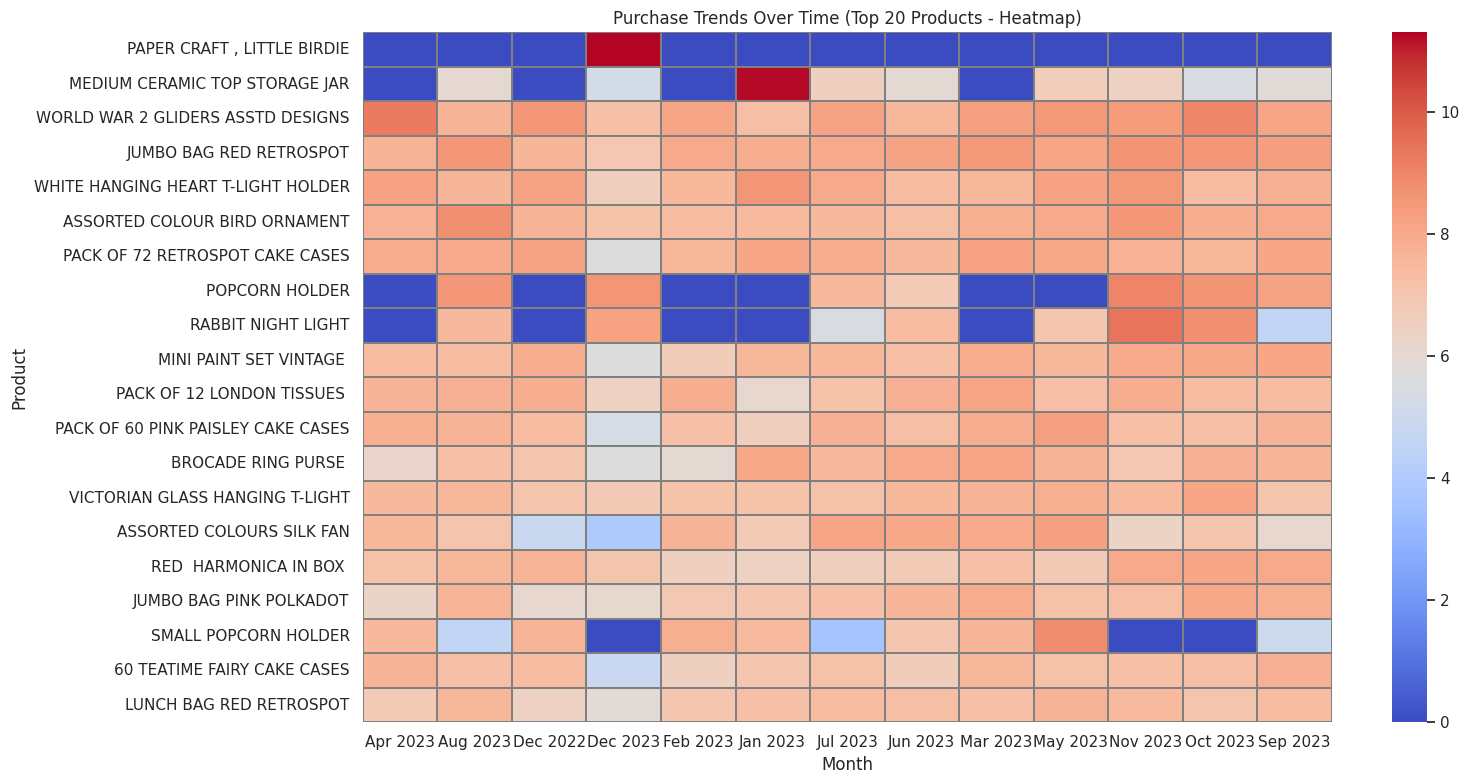

In [254]:
# Heatmap for spotting patterns across time and products

plt.figure(figsize=(16, 8))
sns.heatmap(log_pivot.T, cmap='coolwarm', linewidths=0.1, linecolor='gray')
plt.title("Purchase Trends Over Time (Top 20 Products - Heatmap)")
plt.xlabel("Month")
plt.ylabel("Product")
#plt.yscale('log')
plt.tight_layout()
plt.show()

In [255]:
# Monetary Value Per Transaction

df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Revenue per Invoice
transaction_revenue = df.groupby('InvoiceNo')['Revenue'].sum().reset_index()

transaction_revenue_log = np.log1p(transaction_revenue['Revenue'])

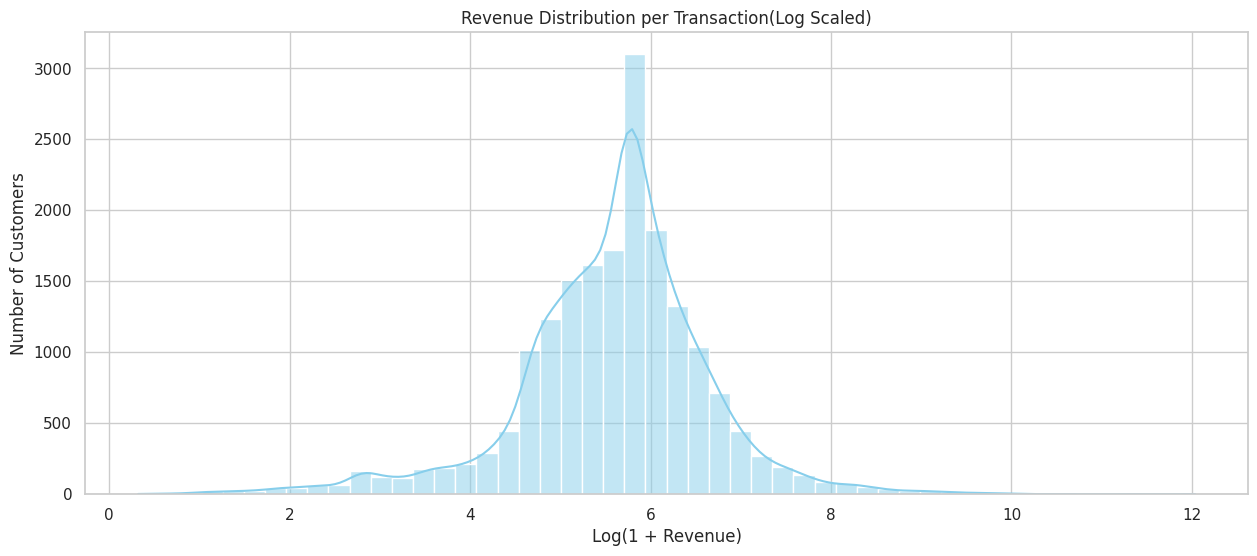

In [256]:
plt.figure(figsize=(15,6))
sns.histplot(transaction_revenue_log, bins=50, kde=True, color='skyblue')
plt.title("Revenue Distribution per Transaction(Log Scaled)")
plt.xlabel("Log(1 + Revenue)")
plt.ylabel("Number of Customers")
#plt.grid(True)
#plt.tight_layout()
plt.show()

In [257]:
# RFM distributions


# Reference date (day after last transaction)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Group by customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'Revenue': 'sum'                                           # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

rfm['Recency_log'] = np.log1p(rfm['Recency'])
rfm['Frequency_log'] = np.log1p(rfm['Frequency'])
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])


scaler = MinMaxScaler()

rfm_normalized = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].copy()
rfm_normalized[['Recency_norm', 'Frequency_norm', 'Monetary_norm']] = scaler.fit_transform(rfm_normalized)

# Optional: Drop original log columns if not needed
# rfm_normalized.drop(['Recency_log', 'Frequency_log', 'Monetary_log'], axis=1, inplace=True)

# Final Normalized RFM ready for clustering
rfm_final = rfm_normalized[['Recency_norm', 'Frequency_norm', 'Monetary_norm']]


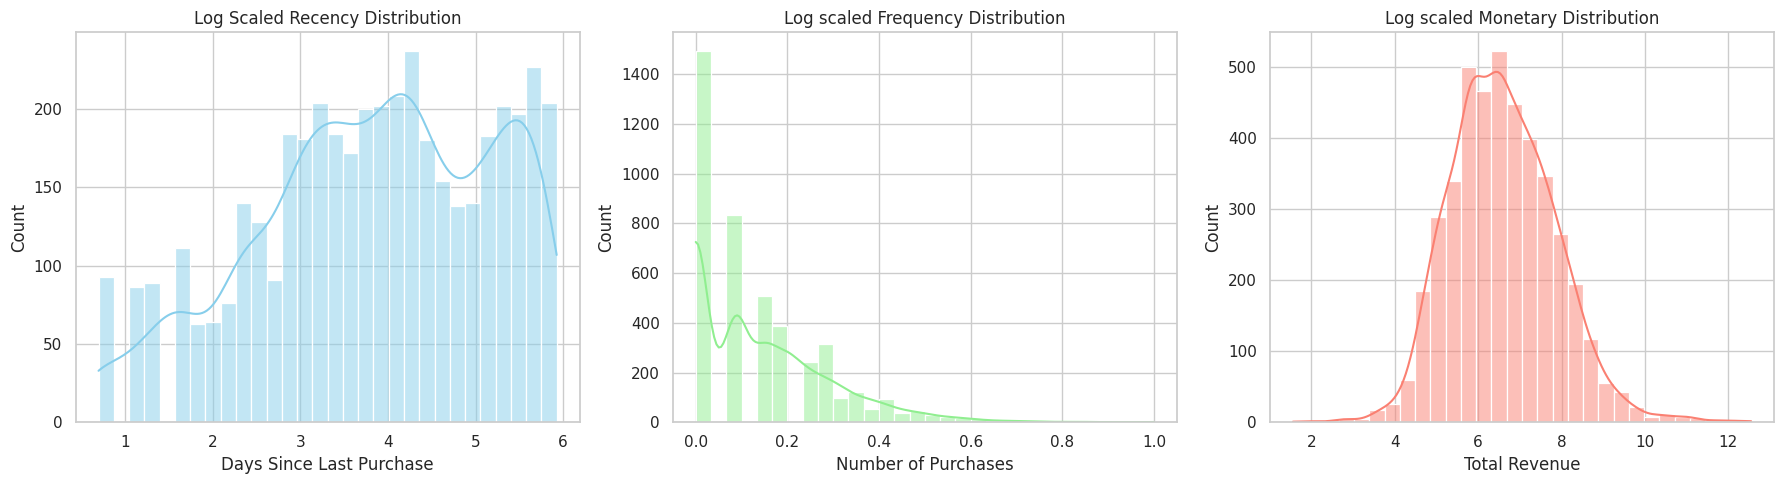

In [258]:
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency_log'], bins=30, kde=True, color='skyblue')
plt.title('Log Scaled Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm_final['Frequency_norm'], bins=30, kde=True, color='lightgreen')
plt.title('Log scaled Frequency Distribution')
plt.xlabel('Number of Purchases')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary_log'], bins=30, kde=True, color='salmon')
plt.title('Log scaled Monetary Distribution')
plt.xlabel('Total Revenue')

plt.tight_layout()
plt.show()


In [259]:
sse = []  # Sum of squared errors (inertia)
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_final)
    sse.append(kmeans.inertia_)


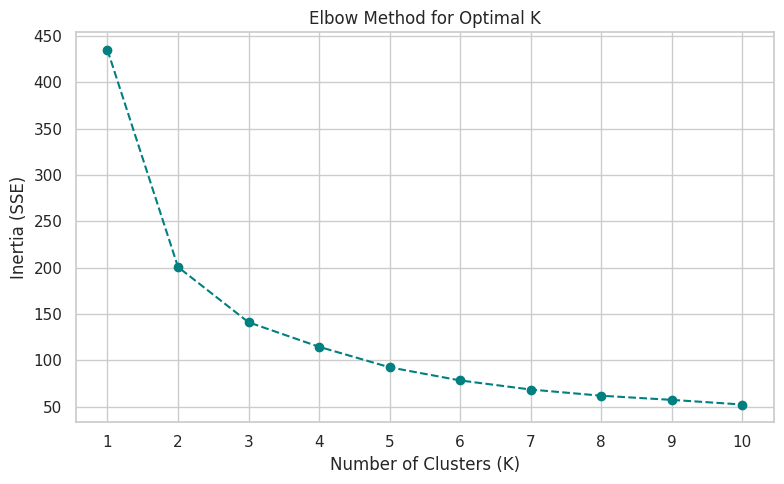

In [260]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o', linestyle='--', color='teal')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [261]:
# Customer cluster profiles


kmeans = KMeans(n_clusters=4, random_state=42)
rfm_normalized['Cluster'] = kmeans.fit_predict(rfm_final)

In [262]:
# Merge with original customer ID and actual RFM values
rfm['Cluster'] = rfm_normalized['Cluster']

In [263]:
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median'],
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'CustomerCount'})

cluster_profile.columns = ['_'.join(col) for col in cluster_profile.columns]
cluster_profile = cluster_profile.reset_index()
cluster_profile

,Cluster,Recency_mean,Recency_median,Frequency_mean,Frequency_median,Monetary_mean,Monetary_median,CustomerCount_count
0,0,36.783523,33.0,1.693252,2.0,487.809002,391.980,1141
1,1,207.273031,199.0,1.592123,1.0,563.510762,335.125,1498
2,2,46.814076,37.0,6.059874,5.0,2819.744908,1815.090,952
3,3,5.878179,5.0,11.306560,7.0,6428.490696,2392.830,747


/tmp/ipython-input-501517088.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-501517088.py:23: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.



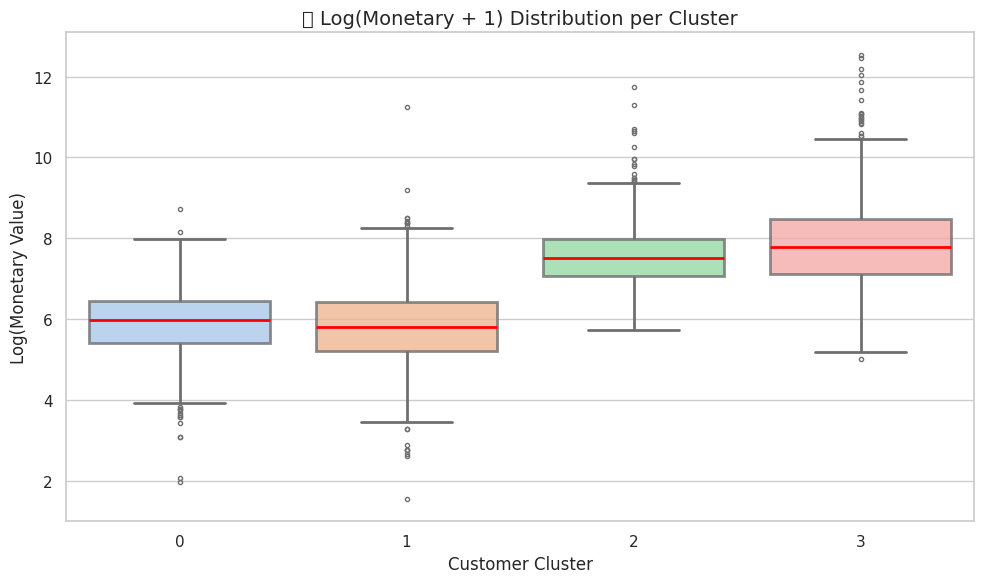

In [264]:
# Optional: log transformation for clarity
rfm['Monetary_log'] = np.log1p(rfm['Monetary'])

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Clean and clear boxplot
sns.boxplot(
    x='Cluster',
    y='Monetary_log',
    data=rfm,
    palette='pastel',
    linewidth=2,
    fliersize=3,         # smaller outlier dots
    boxprops=dict(alpha=0.8),
    medianprops=dict(color="red", linewidth=2),

)

plt.title("💰 Log(Monetary + 1) Distribution per Cluster", fontsize=14)
plt.xlabel("Customer Cluster", fontsize=12)
plt.ylabel("Log(Monetary Value)", fontsize=12)
plt.tight_layout()
plt.show()


In [265]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346.0,326,1,77183.60,5.789960,0.693147,11.253955,1
1,12347.0,2,7,4310.00,1.098612,2.079442,8.368925,3
2,12348.0,75,4,1797.24,4.330733,1.609438,7.494564,2
3,12349.0,19,1,1757.55,2.995732,0.693147,7.472245,0
4,12350.0,310,1,334.40,5.739793,0.693147,5.815324,1
...,...,...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,5.631212,0.693147,5.201806,1
4334,18281.0,181,1,80.82,5.204007,0.693147,4.404522,1
4335,18282.0,8,2,178.05,2.197225,1.098612,5.187665,0
4336,18283.0,4,16,2045.53,1.609438,2.833213,7.623901,3


In [266]:
# Create a binary matrix: rows = Invoice, columns = Product
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.map(lambda x: 1 if x > 0 else 0)  # Convert to binary


In [267]:
# Matrix multiplication to get co-occurrence counts
co_occurrence = basket.T.dot(basket)

In [268]:
top_20 = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20).index
co_occurrence_top = co_occurrence.loc[top_20, top_20]

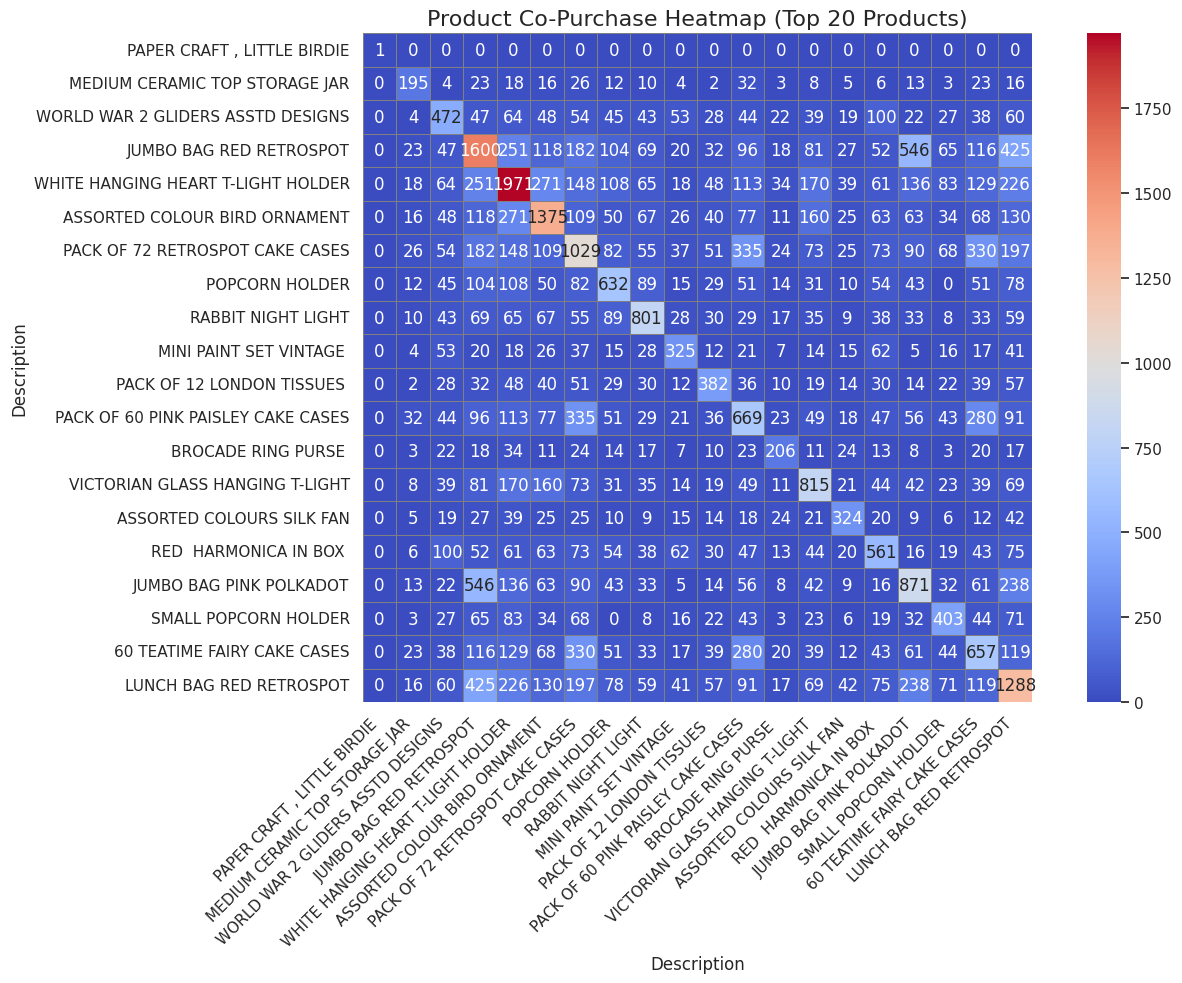

In [269]:
plt.figure(figsize=(14, 10))
sns.heatmap(co_occurrence_top,
            annot=True,
            fmt='g',
            cmap='coolwarm',
            linewidths=0.5,
            linecolor='gray',
            square=True)

plt.title('Product Co-Purchase Heatmap (Top 20 Products)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Step 4 : Clustering Methodology

In [270]:
rfm1 = rfm.drop(["Recency_log", "Frequency_log", "Monetary_log"], axis=1)

In [271]:
rfm1 = rfm1[rfm1['Monetary'] > 0]

In [272]:
rfm1

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,1
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,2
3,12349.0,19,1,1757.55,0
4,12350.0,310,1,334.40,1
...,...,...,...,...,...
4333,18280.0,278,1,180.60,1
4334,18281.0,181,1,80.82,1
4335,18282.0,8,2,178.05,0
4336,18283.0,4,16,2045.53,3


In [273]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [274]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346.0,326,1,77183.60,5.789960,0.693147,11.253955,1
1,12347.0,2,7,4310.00,1.098612,2.079442,8.368925,3
2,12348.0,75,4,1797.24,4.330733,1.609438,7.494564,2
3,12349.0,19,1,1757.55,2.995732,0.693147,7.472245,0
4,12350.0,310,1,334.40,5.739793,0.693147,5.815324,1
...,...,...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,5.631212,0.693147,5.201806,1
4334,18281.0,181,1,80.82,5.204007,0.693147,4.404522,1
4335,18282.0,8,2,178.05,2.197225,1.098612,5.187665,0
4336,18283.0,4,16,2045.53,1.609438,2.833213,7.623901,3


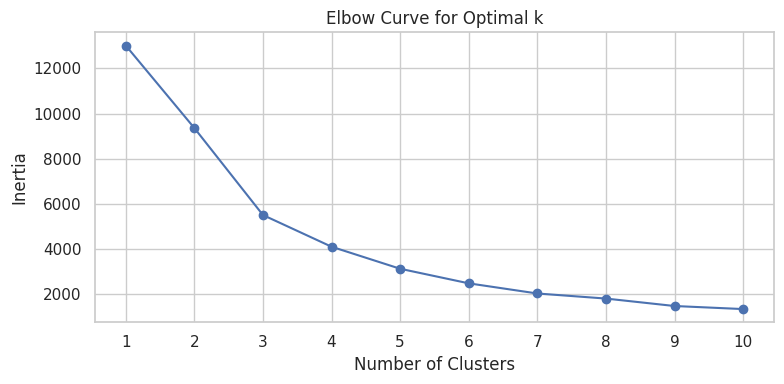

In [275]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()

In [276]:
# Fit Final KMeans Model

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [277]:

rfm_cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
rfm_cluster_summary['CustomerCount'] = rfm['Cluster'].value_counts()
rfm_cluster_summary = rfm_cluster_summary.sort_index()
rfm_cluster_summary


,Recency,Frequency,Monetary,CustomerCount
Cluster,,,,
0,43.7,3.7,1353.6,3054
1,248.1,1.6,478.8,1067
2,7.4,82.5,127188.0,13
3,15.5,22.3,12690.5,204


In [278]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster
0,12346.0,326,1,77183.60,5.789960,0.693147,11.253955,3
1,12347.0,2,7,4310.00,1.098612,2.079442,8.368925,0
2,12348.0,75,4,1797.24,4.330733,1.609438,7.494564,0
3,12349.0,19,1,1757.55,2.995732,0.693147,7.472245,0
4,12350.0,310,1,334.40,5.739793,0.693147,5.815324,1
...,...,...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,5.631212,0.693147,5.201806,1
4334,18281.0,181,1,80.82,5.204007,0.693147,4.404522,1
4335,18282.0,8,2,178.05,2.197225,1.098612,5.187665,0
4336,18283.0,4,16,2045.53,1.609438,2.833213,7.623901,3


In [279]:

rfm_cluster_summary1 = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].median().round(1)
rfm_cluster_summary1['CustomerCount'] = rfm['Cluster'].value_counts()
rfm_cluster_summary1 = rfm_cluster_summary1.sort_index()
rfm_cluster_summary1


,Recency,Frequency,Monetary,CustomerCount
Cluster,,,,
0,32.0,3.0,826.3,3054
1,243.0,1.0,310.3,1067
2,2.0,63.0,117210.1,13
3,5.0,19.0,7990.2,204


In [280]:
# Create subplot with 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=("Recency", "Frequency", "Monetary"))

# Recency Boxplot
fig.add_trace(
    go.Box(y=rfm['Recency'], name='Recency', marker_color='skyblue'),
    row=1, col=1
)

# Frequency Boxplot
fig.add_trace(
    go.Box(y=rfm['Frequency'], name='Frequency', marker_color='lightgreen'),
    row=1, col=2
)

# Monetary Boxplot
fig.add_trace(
    go.Box(y=rfm['Monetary'], name='Monetary', marker_color='salmon'),
    row=1, col=3
)

# Layout
fig.update_layout(
    height=500, width=1000,
    title_text="RFM Distribution (Boxplots)",
    showlegend=False
)

fig.show()


In [281]:
# Create a new DataFrame copy for safe labeling
cluster_labels = {}

# Loop over clusters to assign a label based on RFM characteristics
for i in rfm_cluster_summary.index:
    r = rfm_cluster_summary.loc[i, 'Recency']
    f = rfm_cluster_summary.loc[i, 'Frequency']
    m = rfm_cluster_summary.loc[i, 'Monetary']

    if r > 142 and f > 5 and m > 1660.88:
        cluster_labels[i] = 'High-Value'
    elif f >= 2 and f <= 5 and m > 668 and m < 1661:
        cluster_labels[i] = 'Regular'
    elif r < 18 and f < 2 and m < 306:
        cluster_labels[i] = 'At-Risk'
    else:
        cluster_labels[i] = 'Occasional'

# Apply the mapping
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)


In [282]:
rfm

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Cluster,Segment
0,12346.0,326,1,77183.60,5.789960,0.693147,11.253955,3,Occasional
1,12347.0,2,7,4310.00,1.098612,2.079442,8.368925,0,Regular
2,12348.0,75,4,1797.24,4.330733,1.609438,7.494564,0,Regular
3,12349.0,19,1,1757.55,2.995732,0.693147,7.472245,0,Regular
4,12350.0,310,1,334.40,5.739793,0.693147,5.815324,1,Occasional
...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,5.631212,0.693147,5.201806,1,Occasional
4334,18281.0,181,1,80.82,5.204007,0.693147,4.404522,1,Occasional
4335,18282.0,8,2,178.05,2.197225,1.098612,5.187665,0,Regular
4336,18283.0,4,16,2045.53,1.609438,2.833213,7.623901,3,Occasional


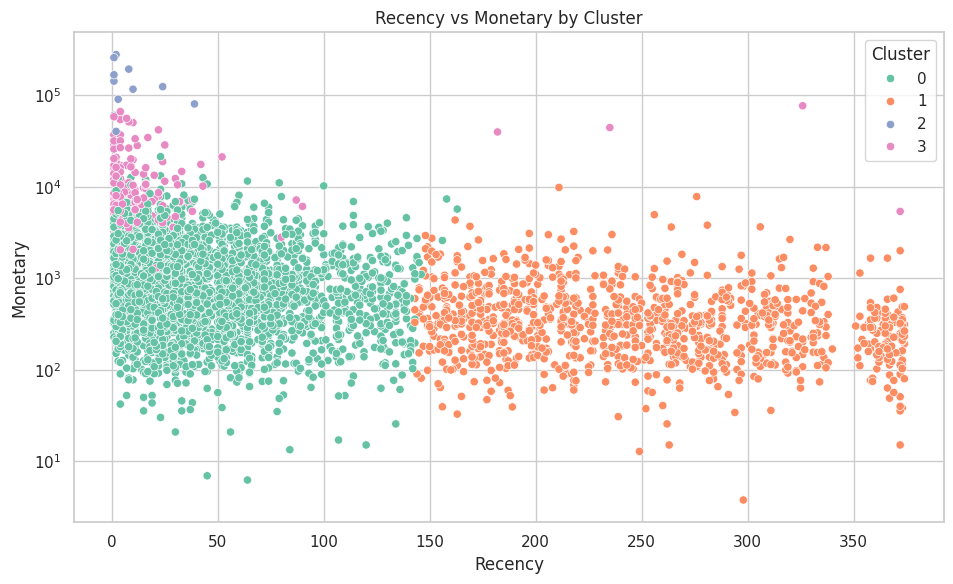

In [283]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title("Recency vs Monetary by Cluster")
plt.tight_layout()
plt.yscale('log')
plt.show()

In [284]:
# Hierarchical Clustering

model = AgglomerativeClustering(n_clusters=4)
rfm['Cluster_Hier'] = model.fit_predict(rfm_scaled)

In [285]:

rfm.groupby('Cluster_Hier')[['Recency', 'Frequency', 'Monetary']].mean().round(1)


,Recency,Frequency,Monetary
Cluster_Hier,,,
0,6.7,83.5,111780.6
1,41.2,3.9,1479.4
2,241.4,1.6,518.6
3,14.6,24.4,14435.5


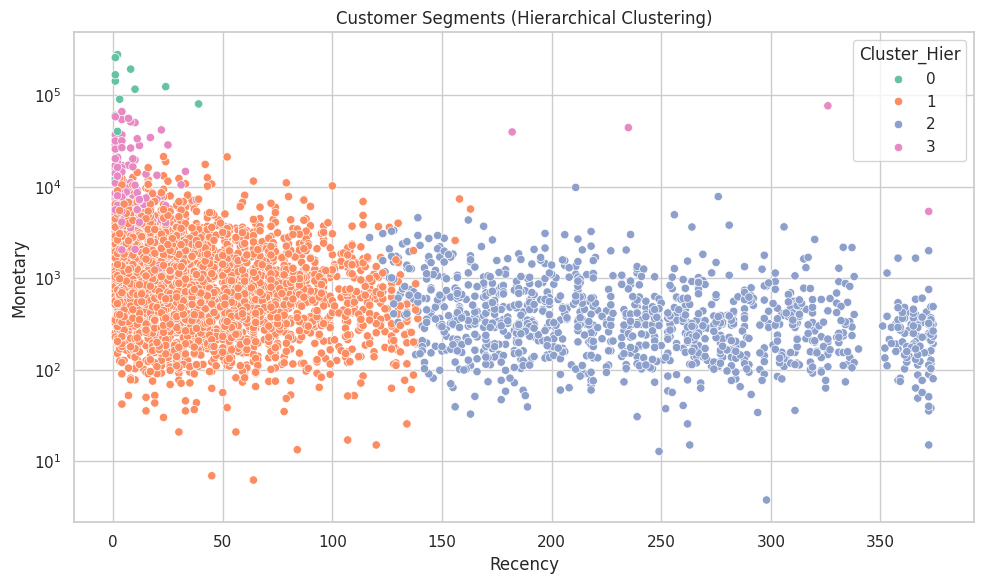

In [286]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster_Hier', palette='Set2')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [287]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,Dec 2022,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec 2022,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,Dec 2022,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec 2022,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,Dec 2022,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France,Dec 2023,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France,Dec 2023,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France,Dec 2023,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France,Dec 2023,16.60


In [288]:
# Step 1: Standardize RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Step 2: Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)
kmeans_silhouette = silhouette_score(rfm_scaled, rfm['KMeans_Cluster'])

# Step 3: Apply Hierarchical Clustering
hier = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm['Hier_Cluster'] = hier.fit_predict(rfm_scaled)
hier_silhouette = silhouette_score(rfm_scaled, rfm['Hier_Cluster'])

print(f"Silhouette Score (KMeans): {kmeans_silhouette:.3f}")
print(f"Silhouette Score (Hierarchical): {hier_silhouette:.3f}")


Silhouette Score (KMeans): 0.616
Silhouette Score (Hierarchical): 0.608


In [289]:
print("\nKMeans Cluster Averages:")
print(rfm.groupby('KMeans_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1))

print("\nHierarchical Cluster Averages:")
print(rfm.groupby('Hier_Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1))



KMeans Cluster Averages:
                Recency  Frequency  Monetary
KMeans_Cluster                              
0                  43.7        3.7    1353.6
1                 248.1        1.6     478.8
2                   7.4       82.5  127188.0
3                  15.5       22.3   12690.5

Hierarchical Cluster Averages:
              Recency  Frequency  Monetary
Hier_Cluster                              
0                 6.7       83.5  111780.6
1                41.2        3.9    1479.4
2               241.4        1.6     518.6
3                14.6       24.4   14435.5


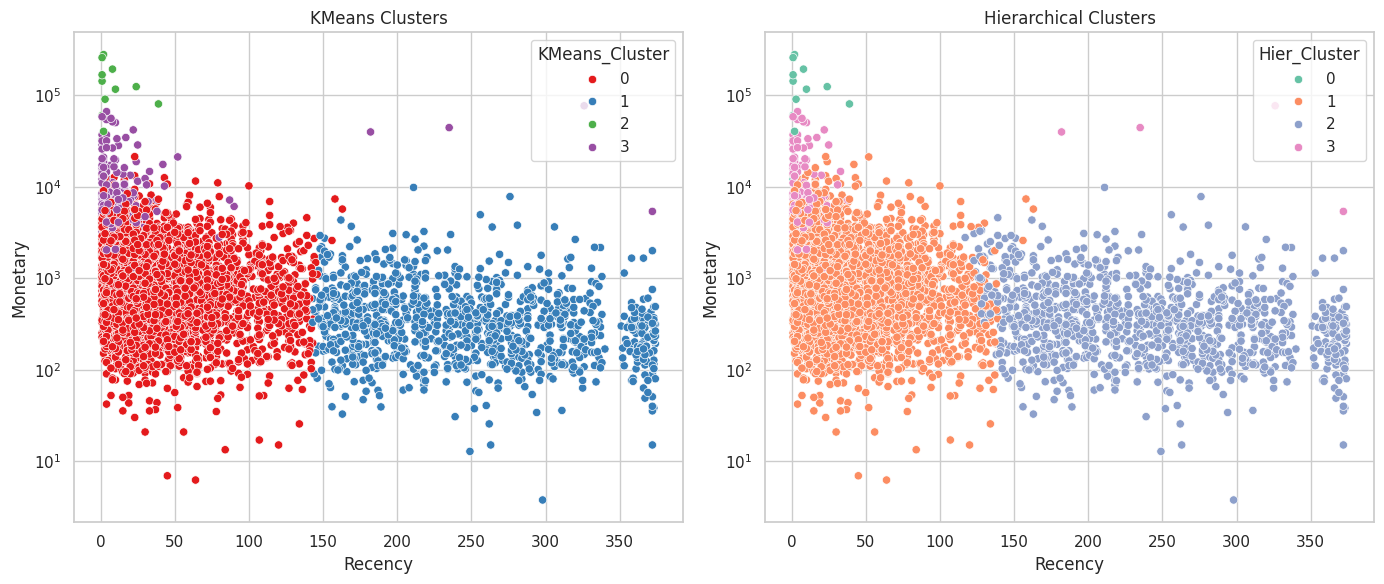

In [290]:
# Recency vs Monetary
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Recency', y='Monetary', hue='KMeans_Cluster', data=rfm, palette='Set1')
plt.title('KMeans Clusters')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Recency', y='Monetary', hue='Hier_Cluster', data=rfm, palette='Set2')
plt.title('Hierarchical Clusters')
plt.yscale('log')

plt.tight_layout()
plt.show()


In [291]:
# After training your kmeans model
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [292]:
from sklearn.metrics.pairwise import cosine_similarity

# ✅ Step 1: Create the Item-Customer Matrix
item_customer_matrix = df.pivot_table(
    index='StockCode',
    columns='CustomerID',
    values='Quantity',
    aggfunc='sum'
).fillna(0)

# ✅ Step 2: Compute Cosine Similarity between Items
cosine_sim_matrix = cosine_similarity(item_customer_matrix)
cosine_sim_df = pd.DataFrame(
    cosine_sim_matrix,
    index=item_customer_matrix.index,
    columns=item_customer_matrix.index
)

# ✅ Step 3: Optional – Create StockCode → Description map
product_map = (
    df[['StockCode', 'Description']]
    .drop_duplicates(subset='StockCode')
    .dropna()
    .set_index('StockCode')
)

# ✅ Step 4: Function to Recommend Top 5 Similar Products
def get_similar_products(stock_code, top_n=5):
    if stock_code not in cosine_sim_df.index:
        return f"Product code {stock_code} not found in data."

    similarity_scores = cosine_sim_df[stock_code].sort_values(ascending=False)
    similarity_scores = similarity_scores.drop(stock_code)  # Remove self
    top_items = similarity_scores.head(top_n)

    # Merge with product descriptions
    descriptions = product_map.reindex(top_items.index)['Description'].values
    result = pd.DataFrame({
        'StockCode': top_items.index,
        'SimilarityScore': top_items.values,
        'Description': product_map.loc[top_items.index, 'Description'].values
    })
    return result.reset_index(drop=True)



In [293]:
# Step 5: Example Usage
# You can pass a known StockCode (e.g., '85123A') to see results
example_recommendations = get_similar_products('85123A', top_n=5)
display(example_recommendations)

,StockCode,SimilarityScore,Description
0,21175,0.749457,GIN + TONIC DIET METAL SIGN
1,21733,0.658728,RED HANGING HEART T-LIGHT HOLDER
2,82552,0.643888,WASHROOM METAL SIGN
3,82551,0.642474,LAUNDRY 15C METAL SIGN
4,23288,0.630984,GREEN VINTAGE SPOT BEAKER


In [294]:
# Save cosine similarity matrix as a pickle file
with open('similarity_matrix.pkl', 'wb') as f:
    pickle.dump(cosine_sim_df, f)

# Save product_map
with open('product_map.pkl', 'wb') as f:
    pickle.dump(product_map, f)